<a href="https://colab.research.google.com/github/vanivaranya/QIBSIP-task-1/blob/main/Iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


EDA

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 6)

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Visualization

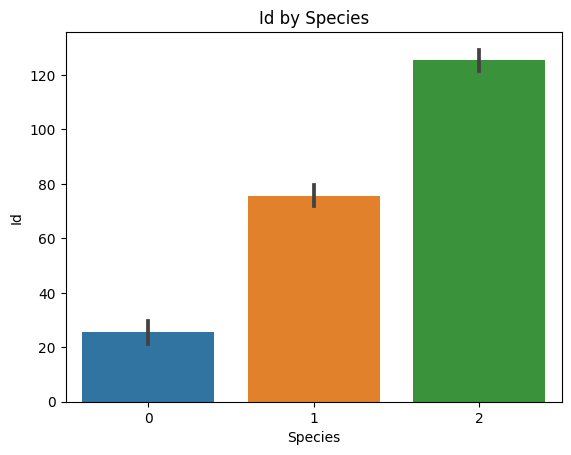

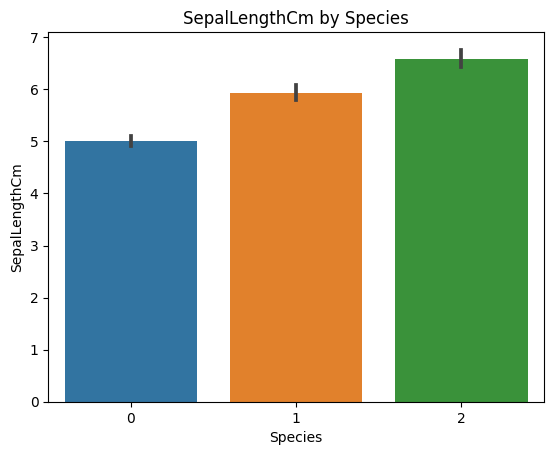

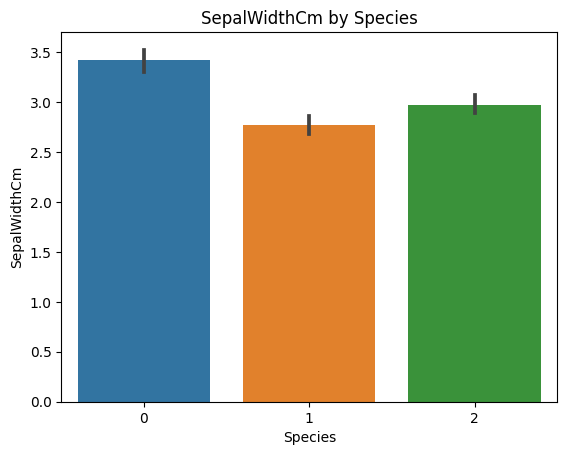

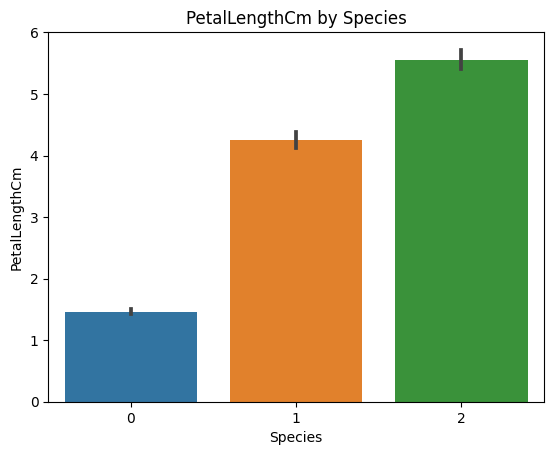

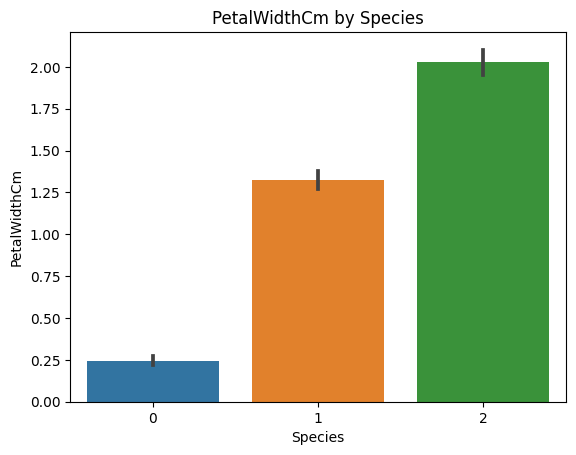

In [ ]:
#LabelEncoder to encode the 'Species' column

le = LabelEncoder()
data['SpeciesEncoded'] = le.fit_transform(data['Species'])

for column in columns:
    if column != 'Species':  # Exclude the 'Species' column for bar plots
        sns.barplot(x='SpeciesEncoded', y=column, data=data)
        plt.title(f'{column} by Species')
        plt.xlabel('Species')
        plt.show()

<Axes: >

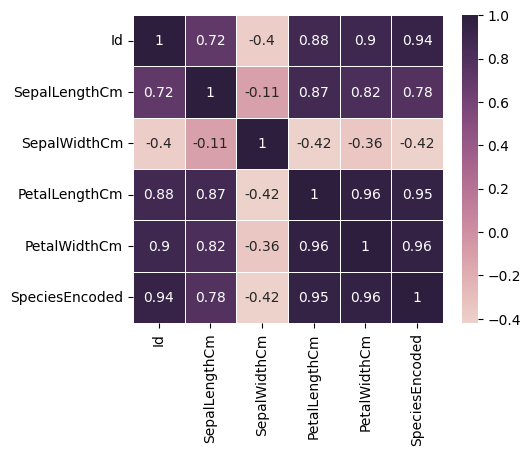

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True,linewidth=.5, ax=ax, cmap=sns.cubehelix_palette(as_cmap=True))

Model Training

In [ ]:
X = data.drop(columns=['Species'])
Y = data['Species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

Modelling

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train,y_train)
log_reg_accuracy = log_reg.score(x_test, y_test)
print("Accuracy of Logistic Regression: ", log_reg_accuracy*100)
y_pred_log_reg = log_reg.predict(x_test)

Accuracy of Logistic Regression:  100.0


KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_accuracy=knn.score(x_test, y_test)
print("Accuracy of KNN model:",knn_accuracy*100)
y_pred_knn=knn.predict(x_test)

Accuracy of KNN model: 100.0


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
decision_tree_accuracy = decision_tree.score(x_test,y_test)
print("Accuracy of Decision Tree: ", decision_tree_accuracy*100)
y_pred_desc_tree=decision_tree.predict(x_test)

Accuracy of Decision Tree:  100.0


Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matr_logreg=confusion_matrix(y_test,y_pred_log_reg)
conf_matr_knn=confusion_matrix(y_test,y_pred_knn)
conf_matr_desc_tree=confusion_matrix(y_test,y_pred_desc_tree)

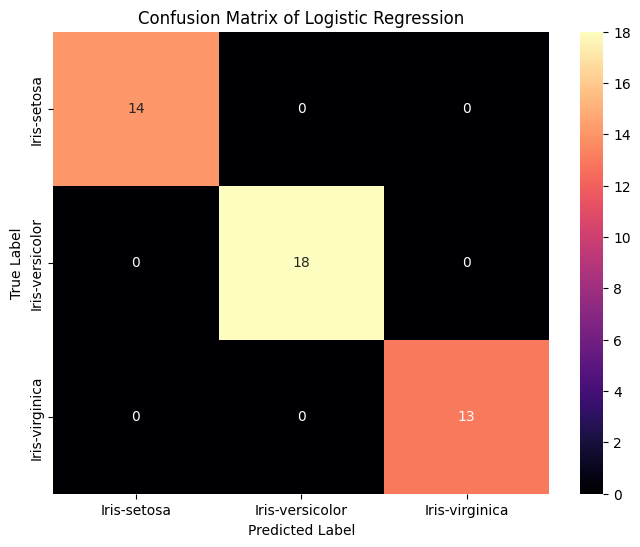

In [ ]:
#Confusion Matrix of Logistic Regression
plt.figure(figsize=(8,6))
sns.heatmap(conf_matr_logreg,annot=True,fmt='d',cmap='magma', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

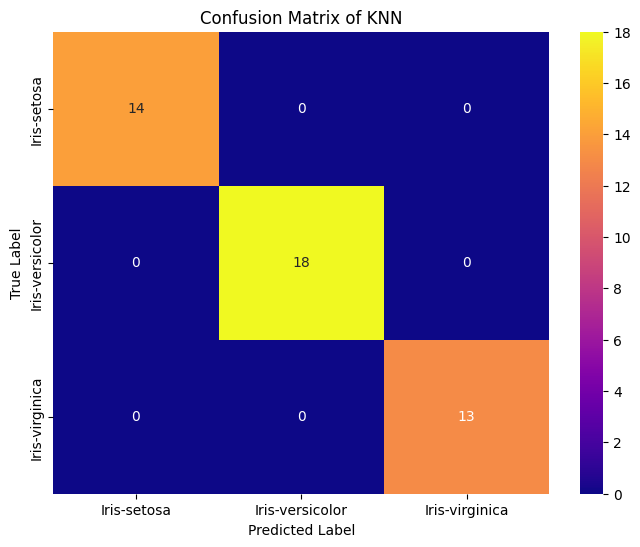

In [ ]:
#Confusion Matrix of KNN Model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matr_knn, annot=True, fmt='d', cmap='plasma', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

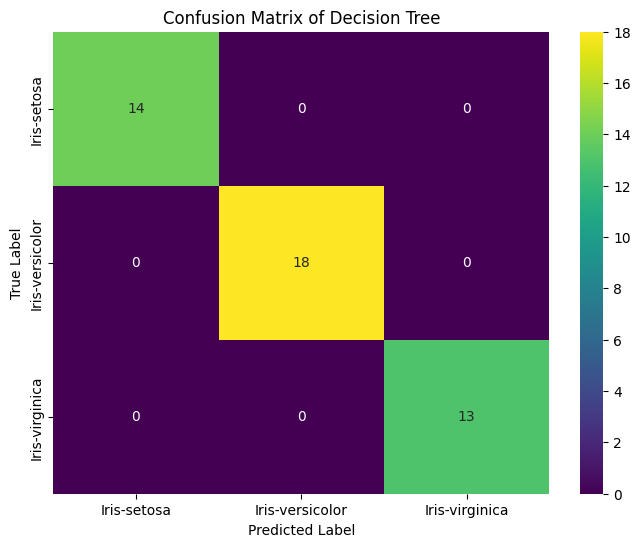

In [ ]:
#Confusion Matrix of Decision Tree model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matr_desc_tree, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()


Project Report

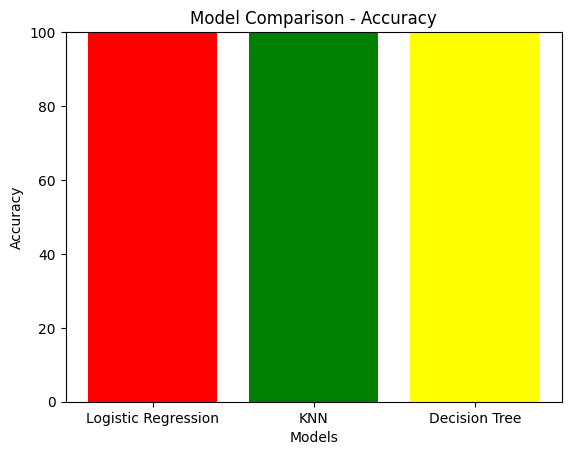

In [ ]:
# Model Comparison - Visualization
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [log_reg_accuracy*100, knn_accuracy*100, decision_tree_accuracy*100]
plt.bar(models, accuracies, color=['Red', 'green', 'yellow'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()


All the models give same accuracy of 100%!